# Problem Statement

A Chinese automobile company Geely Auto aspires to enter the Nigerian market by setting up its manufacturing unit and producing cars locally to compete with their Nigerian, US and European counterparts.

They have contacted you, a Data Scientist to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the Nigerian market, since those may be very different from the Chinese market. 

The company wants to know:

●	Which variables are significant in predicting the price of a car

●	How well do those variables describe the price of a car
Based on various market surveys, you have gathered a large data set of different types of cars across the Nigerian market.

Business Goal (Objective)

You are required to model the price of cars with the available independent variables. The management will use it to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


# Steps to follow

Reading, understanding and visualising the data.

Preparing the data for modeling (train-test split, rescalling etc)

Training the model

Residual analysis

Predictions and evaluation on the test set

# Importing libraries

In [115]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Train-test split
from sklearn.model_selection import train_test_split
# Min-max scling
from sklearn.preprocessing import MinMaxScaler
# Statsmodel 
import statsmodels.api as sm
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#R-squared
from sklearn.metrics import r2_score
# Label encoding
from sklearn.preprocessing import LabelEncoder
# Importing RFE
from sklearn.feature_selection import RFE
# Importing LinearRegression
from sklearn.linear_model import LinearRegression
# Supress warning
import warnings
warnings.filterwarnings('ignore')

In [116]:
# Libraries for cross validation 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict

In [117]:
pd.set_option('display.max_columns',None)
%matplotlib inline

# Step 1:- Reading and understanding the data

In [118]:
# Read the data
df_car = pd.read_csv('CarPrice_data.csv')
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [119]:
df_car.shape

(205, 26)

In [120]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [121]:
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Spliting the "Car company" from "CarName"

In [122]:
car_company = df_car["CarName"].str.split(" ", n = 1, expand = True)
df_car['CarCompany'] = car_company[0]

# Dropping 'CarName' column
df_car.drop('CarName',axis=1,inplace=True)
df_car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [123]:
# Dropping car_ID column as it will not be used in our analysis
df_car.drop('car_ID',axis=1,inplace=True)

# Handaling missing values in columns

In [124]:
# Count missing values column wise
df_car.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
CarCompany          0
dtype: int64

# Observations

There are no missing values in any column. So as in rows.

# Cleaning data

There are few column values that need to be replaced. These seems to be spelling mistakes.

In [125]:
#Replacing '4wd' with 'fwd' in 'drivewheel' column
df_car['drivewheel'] = df_car['drivewheel'].replace('4wd','fwd')

In [126]:
# Replacing 'maxda' with 'mazda' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('maxda','mazda')

In [127]:
# Replacing 'porcshce' with 'porsche' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('porcshce','porsche')

In [128]:
# Replacing 'toyouta' with 'toyota' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('toyouta','toyota')

In [129]:
# Replacing 'vokswagen' with 'volkswagen' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('vokswagen','volkswagen')

In [130]:
# Replacing 'Nisaan' with 'nissan' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('Nissan','nissan')

In [131]:
# Replacing 'vw' with 'volkswagen' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('vw','volkswagen')

# Handling outliers

In [132]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_numeric = ['wheelbase','carlength','carwidth','carheight','curbweight',
                    'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

for col in col_numeric: 
    q1 = df_car[col].quantile(0.25)
    q3 = df_car[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_car = df_car.loc[(df_car[col] > range_low) & (df_car[col] < range_high)]

df_car.shape

(123, 25)

We can see that there are (205-123)=82 records, which are outliers in the dataset.

# Checking Data Imbalance

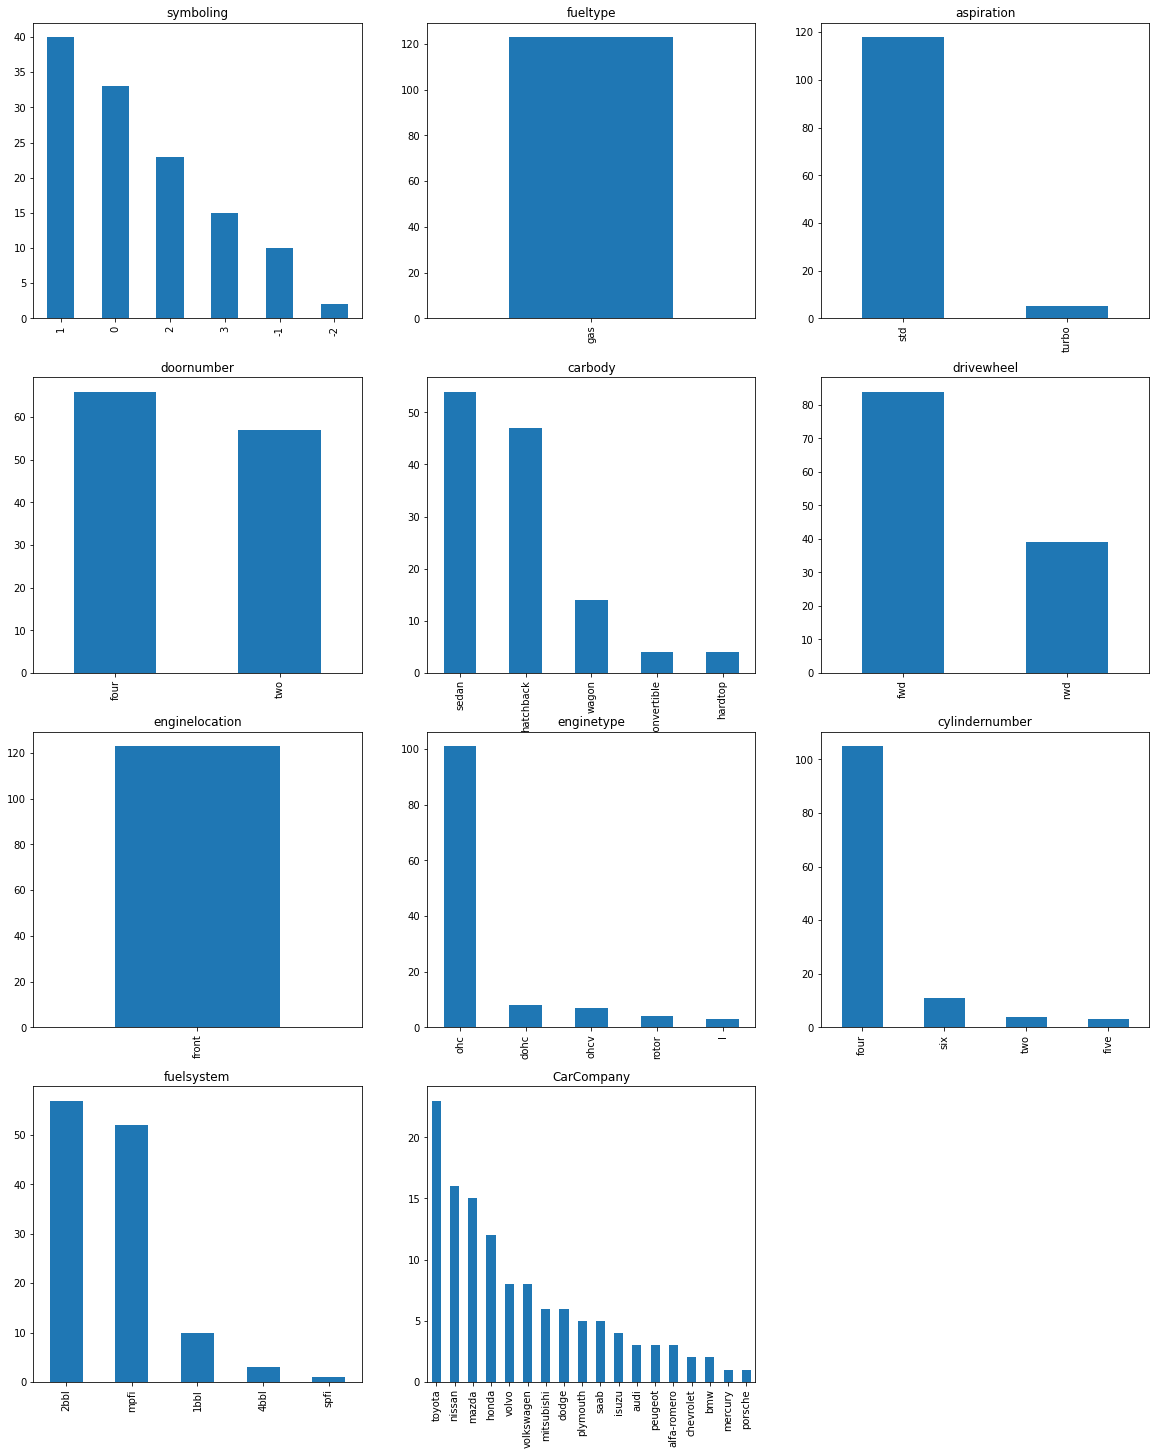

In [133]:
# Listing categorical columns for checking data imbalance and plotting them
col_category = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
           'cylindernumber','fuelsystem','CarCompany']

k=0
plt.figure(figsize=(20,25))
for col in col_category:    
    k=k+1
    plt.subplot(4, 3,k)    
    df_car[col].value_counts().plot(kind='bar');
    plt.title(col)

# Observations

We can see that there is data imbalance in below columns:-

symbolling - There are very few with rating -2.

fueltype - All the cars fuel type is Gas, as Diesel cars were removed while removing outliers..

aspiration - Lesser number of turbo than std.

engineloaction - All the engine location is in front, as all the rear engine cars were removed while removing outliers.

enginetype - Considerably more number of ohc than others.

cylindernumber - Large number of four cylinders than others.

fulesystem - mpfi and 2bbl fuelsystem cars are more comparitavely others.

CarCompany - Most of the Toyata company cars were surveyed.

# Visualising the data to check the possiblity of linear regression model

<Figure size 864x864 with 0 Axes>

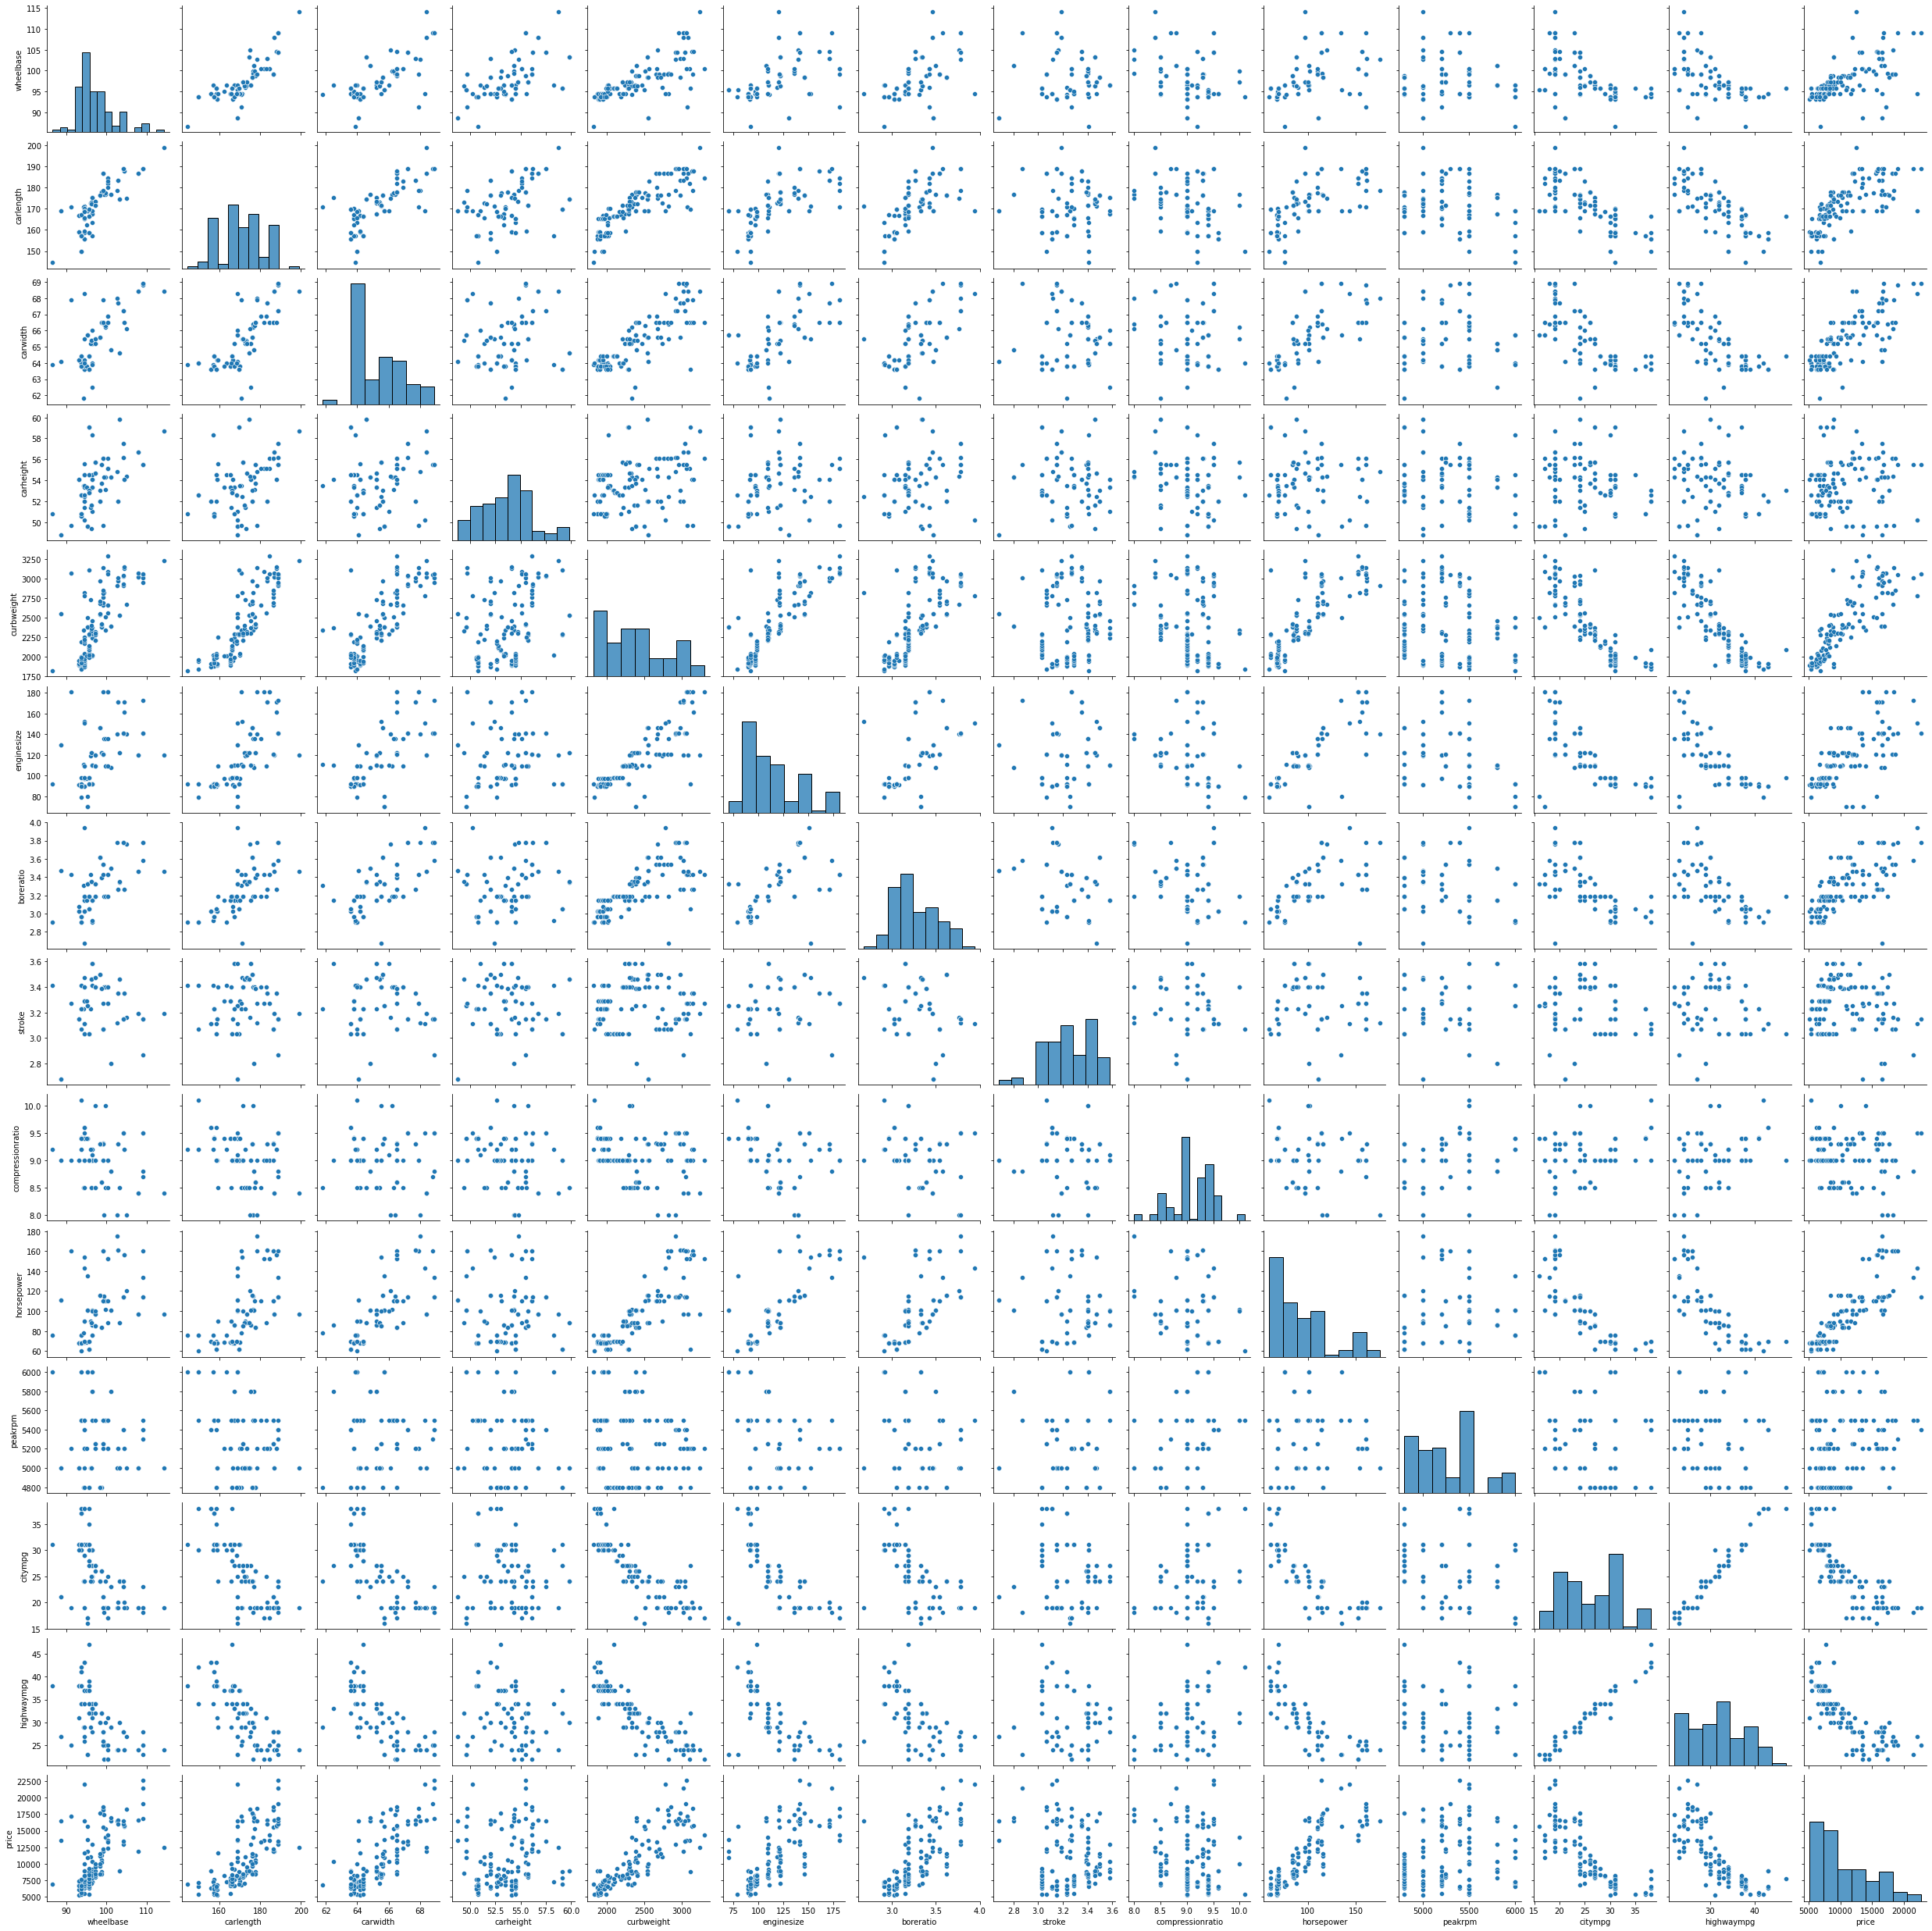

In [134]:
# Visualising the numerical variables
plt.figure(figsize=(12,12))
sns.pairplot(df_car[col_numeric])
plt.show()

We can see that there are few columns that have linear relationship with the target variable "price". So, we can build a linear regression model here.

# Visualising the categorical variables

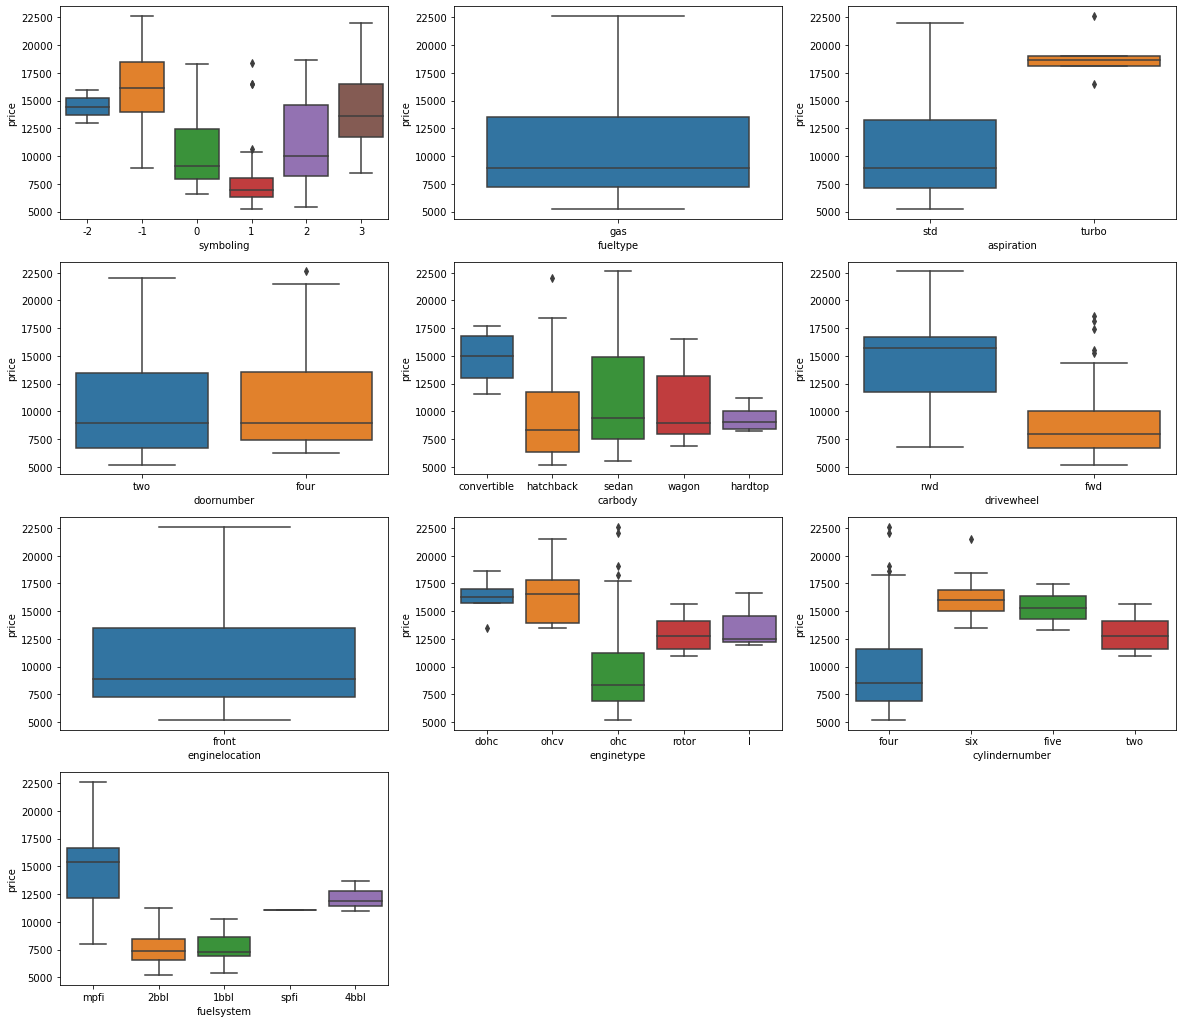

In [135]:
# Boxplot for all categorical variables except CarCompany
# As X labels are not clearly visible for CarCompany. It is plotted in the next cell with bigger figure size.
k=0
plt.figure(figsize=(20,18))
for col in range (len(col_category)-1):    
    k=k+1
    plt.subplot(4, 3, k)   
    ax = sns.boxplot(x = col_category[col], y = 'price', data = df_car)

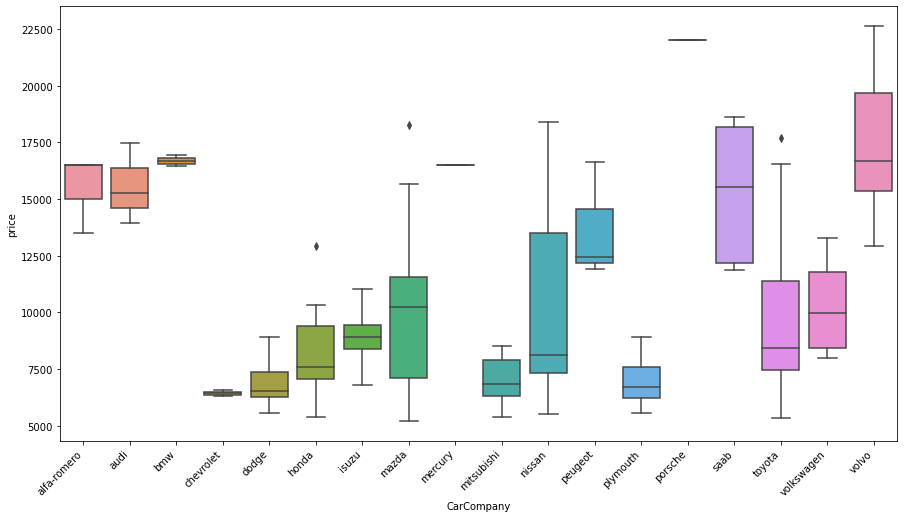

In [136]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'CarCompany', y = 'price', data = df_car)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

# Observations

CarCompany - Porsche has very high median price compared to other cars,though the number of Porsche cars is very less.

Volvo, alfa-romero, audi and BMW are also high median price than others. Saab has wide rage of price, with high median price.
aspiration - std has lower median than turbo.

carbody - convertible has higher median that others.
symboling - -2 and -1 have higher median price than others.

enginelocation - rear has very high median price than front.

cylindernumber - Four has lower median than others.

fulesystem - 1bbl and 2bbl have lower median price than others.

Now atleast we know that what are the variables have impact on the price. So as which variables are important for the model building.

# Step 2:- Preparing the data for model building

# Encoding

Converting categorical variables (fueltype, aspiration, doornumber, drivewheel, enginelocation) with two levels to binary variables.

In [137]:
# fueltype
# Convert "gas" to 1 and "diesel" to 0
df_car['fueltype'] = df_car['fueltype'].map({'gas': 1, 'diesel': 0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [138]:
# aspiration
# Convert "std" to 1 and "turbo" to 0
df_car['aspiration'] = df_car['aspiration'].map({'std':1, 'turbo':0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [139]:
# doornumber
# Convert "four" to 1 and "two" to 0
df_car['doornumber'] = df_car['doornumber'].map({'four':1, 'two':0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,1,0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,1,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [140]:
# drivewheel
# Convert "fwd" to 1 and "rwd" to 0
df_car['drivewheel'] = df_car['drivewheel'].map({'fwd':1, 'rwd':0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,1,0,convertible,0,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,0,convertible,0,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,0,hatchback,0,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,1,sedan,1,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,1,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [141]:
# enginelocation
# Convert "front" to 1 and "rear" to 0
df_car['enginelocation'] = df_car['enginelocation'].map({'front':1, 'rear':0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,0,hatchback,0,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,1,sedan,1,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,1,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


# Dummy variables

Converting other categorical variables with more than two levels to dummy variables. We have to create (n-1) dummy variables by removing the base status. n is the number of levels of the variables.

# symboling

In [142]:
# Creating dummy variables for 'symboling'
# Dropping the redundant dummy variable (-2)
symboling_status = pd.get_dummies(df_car['symboling'],drop_first=True)
symboling_status.head()

,-1,0,1,2,3
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [143]:
# Renaming column names for better readability
symboling_status = symboling_status.rename(columns={-1:'symboling(-1)', 0:'symboling(0)', 1:'symboling(1)',2:'symboling(2)', 3:'symboling(3)'})
symboling_status.head()

,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3)
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [144]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,symboling_status], axis=1)
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3)
0,3,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1
1,3,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1
2,1,1,1,0,hatchback,0,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0
3,2,1,1,1,sedan,1,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0
4,2,1,1,1,sedan,1,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0


In [145]:
# Dropping the 'symboling' column as we don't need it anymore
df_car = df_car.drop('symboling',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3)
0,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1
1,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1
2,1,1,0,hatchback,0,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0
3,1,1,1,sedan,1,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0
4,1,1,1,sedan,1,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0


# carbody

In [146]:
# Creating dummy variables for 'carbody'
# Dropping the redundant dummy variable (convertible)
carbody_status = pd.get_dummies(df_car['carbody'],drop_first=True)
carbody_status.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [147]:
# Renaming column names for better readability
carbody_status = carbody_status.rename(columns={'hardtop':'carbody(hardtop)', 'hatchback':'carbody(hatchback)', 'sedan':'carbody(sedan)','wagon':'carbody(wagon)'})
carbody_status.head()

,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [148]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,carbody_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0
1,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0
2,1,1,0,hatchback,0,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0
3,1,1,1,sedan,1,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0
4,1,1,1,sedan,1,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0


In [149]:
# Dropping the 'symboling' column as we don't need it
df_car = df_car.drop('carbody',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0


In [150]:
# Creating dummy variables for 'enginetype'
# Dropping the redundant dummy variable (dohc)
enginetype_status = pd.get_dummies(df_car['enginetype'], drop_first=True)
enginetype_status.head()

,l,ohc,ohcv,rotor
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [151]:
# Renaming column name for better readability
enginetype_status = enginetype_status.rename(columns={'dohcv':'enginetype(dohcv)', 'l':'enginetype(l)', 'ohc':'enginetype(ohc)', 
                                                      'ohcf':'enginetype(ohcf)','ohcv':'enginetype(ohcv)' ,'rotor':'enginetype(rotor)'})
enginetype_status.head()

,enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [152]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,enginetype_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0


In [153]:
# Dropping the 'enginetype' column as we don't need it
df_car = df_car.drop('enginetype',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0


# cylindernumber

In [154]:
# Creating dummy variables for 'cylindernumber'
# Dropping the redundant dummy variable (eight)
cylindernumber_status = pd.get_dummies(df_car['cylindernumber'], drop_first=True)
cylindernumber_status.head()

,four,six,two
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,0


In [155]:
# Renaming column name for better readability
cylindernumber_status = cylindernumber_status.rename(columns={'five':'cylindernumber(five)', 'four':'cylindernumber(four)', 'six':'cylindernumber(six)', 
                                                      'three':'cylindernumber(three)','twelve':'cylindernumber(twelve)' ,'two':'cylindernumber(two)'})
cylindernumber_status.head()

,cylindernumber(four),cylindernumber(six),cylindernumber(two)
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,0


In [156]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,cylindernumber_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [157]:
# Dropping the 'cylindernumber' column as we don't need it
df_car = df_car.drop('cylindernumber',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


# fuelsystem

In [158]:
# Creating dummy variables for 'fuelsystem'
# Dropping the redundant dummy variable (1bbl)
fuelsystem_status = pd.get_dummies(df_car['fuelsystem'], drop_first=True)
fuelsystem_status.head()

,2bbl,4bbl,mpfi,spfi
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [159]:
# Renaming column name for better readability
fuelsystem_status = fuelsystem_status.rename(columns={'2bbl':'fuelsystem(2bbl)', '4bbl':'fuelsystem(4bbl)', 'idi':'fuelsystem(idi)', 
                                                      'mfi':'fuelsystem(mfi)','mpfi':'fuelsystem(mpfi)' ,'spdi':'fuelsystem(spdi)',
                                                             'spfi':'fuelsystem(spfi)'})
fuelsystem_status.head()

,fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [160]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,fuelsystem_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [161]:
# Dropping the 'fuelsystem' column as we don't need it
df_car = df_car.drop('fuelsystem',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


# CarCompany

In [162]:
# Creating dummy variables for 'CarCompany'
# Dropping the redundant dummy variable (alfa-romero)
CarCompany_status = pd.get_dummies(df_car['CarCompany'], drop_first=True)
CarCompany_status.head()

,audi,bmw,chevrolet,dodge,honda,isuzu,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,saab,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [163]:
# Renaming column name for better readability
CarCompany_status = CarCompany_status.rename(columns={'audi':'CarCompany(audi)', 'bmw':'CarCompany(bmw)', 'buick':'CarCompany(buick)', 
                                                      'chevrolet':'CarCompany(chevrolet)','dodge':'CarCompany(dodge)' ,'honda':'CarCompany(honda)',
                                                      'isuzu':'CarCompany(isuzu)','jaguar':'CarCompany(jaguar)','mazda':'CarCompany(mazda)',
                                                      'mercury':'CarCompany(mercury)','mitsubishi':'CarCompany(mitsubishi)','nissan':'CarCompany(nissan)',
                                                      'peugeot':'CarCompany(peugeot)','plymouth':'CarCompany(plymouth)','porsche':'CarCompany(porsche)',
                                                      'renault':'CarCompany(renault)','saab':'CarCompany(saab)','subaru':'CarCompany(subaru)',
                                                      'toyota':'CarCompany(toyota)','volkswagen':'CarCompany(volkswagen)','volvo':'CarCompany(volvo)'})
                                                    
CarCompany_status.head()

,CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [164]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,CarCompany_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [165]:
# Dropping the 'CarCompany' column as we don't need it
df_car = df_car.drop('CarCompany',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 204
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fueltype                123 non-null    int64  
 1   aspiration              123 non-null    int64  
 2   doornumber              123 non-null    int64  
 3   drivewheel              123 non-null    int64  
 4   enginelocation          123 non-null    int64  
 5   wheelbase               123 non-null    float64
 6   carlength               123 non-null    float64
 7   carwidth                123 non-null    float64
 8   carheight               123 non-null    float64
 9   curbweight              123 non-null    int64  
 10  enginesize              123 non-null    int64  
 11  boreratio               123 non-null    float64
 12  stroke                  123 non-null    float64
 13  compressionratio        123 non-null    float64
 14  horsepower              123 non-null    in

Every columns in the dataset is converted to numerical column, which was necessary for performing the linear regression.

In [167]:
# Splitting train and test dataset into 70:30 percent ratio.
df_train, df_test = train_test_split(df_car, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(86, 56)
(37, 56)


# Rescaling the Features with Min-max scaling (Normalization)

In [168]:
# Create a list of numeric variables. We don't need categorical variables because they are already scalled in 0 and 1.
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
            'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

# Instantiate an object
scaler = MinMaxScaler()

# Fit the data in the object
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
38,1,1,0,1,1,0.358696,0.421731,0.301887,0.409091,0.318213,0.360360,0.373016,1.000000,0.476190,0.226087,0.833333,0.500000,0.44,0.215015,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
98,1,1,0,1,1,0.307971,0.327808,0.037736,0.409091,0.127962,0.243243,0.373016,0.677778,0.666667,0.078261,0.333333,0.681818,0.60,0.165932,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
180,1,1,1,0,1,0.648551,0.795580,0.547170,0.481818,0.888287,0.909910,0.468254,0.744444,0.571429,0.834783,0.333333,0.181818,0.08,0.597644,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
35,1,1,1,1,1,0.358696,0.346225,0.075472,0.518182,0.129316,0.198198,0.182540,0.811111,0.571429,0.139130,1.000000,0.636364,0.48,0.110583,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
61,1,1,0,1,1,0.442029,0.611418,0.547170,0.445455,0.383209,0.468468,0.563492,0.788889,0.285714,0.208696,0.000000,0.454545,0.40,0.302042,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


All the variables are scaled in a range between 0 to 1.

In [169]:
df_train.describe()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
count,86.0,86.00000,86.000000,86.000000,86.0,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.00000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.00000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.00000,86.000000,86.000000,86.000000,86.000000,86.00000
mean,1.0,0.94186,0.511628,0.709302,1.0,0.378202,0.468393,0.285871,0.415856,0.369464,0.387492,0.456349,0.622545,0.521705,0.293124,0.392926,0.476744,0.417209,0.292751,0.081395,0.244186,0.337209,0.186047,0.139535,0.046512,0.395349,0.418605,0.093023,0.011628,0.825581,0.05814,0.034884,0.872093,0.081395,0.034884,0.511628,0.023256,0.372093,0.011628,0.023256,0.023256,0.023256,0.05814,0.093023,0.023256,0.081395,0.011628,0.069767,0.139535,0.011628,0.05814,0.011628,0.034884,0.197674,0.046512,0.05814
std,0.0,0.23538,0.502797,0.456748,0.0,0.162068,0.198184,0.269247,0.226509,0.273911,0.234993,0.203495,0.218194,0.186002,0.262867,0.299614,0.265295,0.236646,0.251332,0.275045,0.432123,0.475530,0.391427,0.348536,0.211825,0.491793,0.496224,0.292169,0.107833,0.381695,0.23538,0.184561,0.335945,0.275045,0.184561,0.502797,0.151599,0.486198,0.107833,0.151599,0.151599,0.151599,0.23538,0.292169,0.151599,0.275045,0.107833,0.256249,0.348536,0.107833,0.23538,0.107833,0.184561,0.400581,0.211825,0.23538
min,1.0,0.00000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.0,1.00000,0.000000,0.000000,1.0,0.286232,0.354972,0.042453,0.240909,0.125931,0.198198,0.293651,0.477778,0.476190,0.078261,0.166667,0.318182,0.240000,0.094860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.0,1.00000,1.000000,1.000000,1.0,0.329710,0.449355,0.188679,0.395455,0.323968,0.346847,0.404762,0.625000,0.500000,0.221739,0.333333,0.500000,0.420000,0.198567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.0,1.00000,1.000000,1.000000,1.0,0.442029,0.587477,0.438679,0.543182,0.549425,0.468468,0.595238,0.800000,0.666667,0.443478,0.583

# Step 3:- Training the model

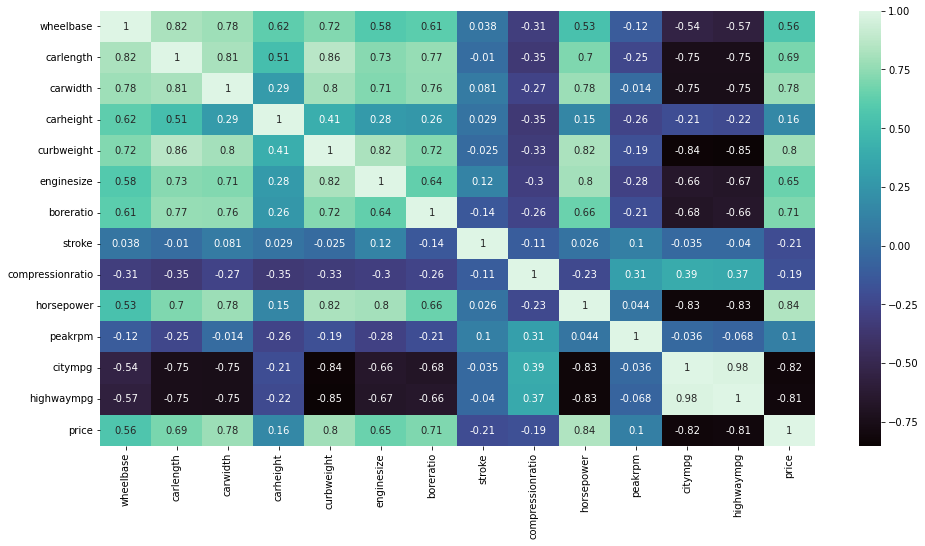

In [170]:
#Let's check the correlation coefficients of all numerical variables except categorical variables to see which variables are highly correlated

plt.figure(figsize = (16, 8))
sns.heatmap(df_train[num_vars].corr(), annot = True, cmap="mako")
plt.show()

# Create X_train and y_train

In [171]:
# Popping out the 'price' column for y_train
y_train = df_train.pop('price') 
# Creating X_train
X_train = df_train

In [172]:
y_train.head()

38     0.215015
98     0.165932
180    0.597644
35     0.110583
61     0.302042
Name: price, dtype: float64

In [173]:
X_train.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
38,1,1,0,1,1,0.358696,0.421731,0.301887,0.409091,0.318213,0.360360,0.373016,1.000000,0.476190,0.226087,0.833333,0.500000,0.44,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
98,1,1,0,1,1,0.307971,0.327808,0.037736,0.409091,0.127962,0.243243,0.373016,0.677778,0.666667,0.078261,0.333333,0.681818,0.60,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
180,1,1,1,0,1,0.648551,0.795580,0.547170,0.481818,0.888287,0.909910,0.468254,0.744444,0.571429,0.834783,0.333333,0.181818,0.08,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
35,1,1,1,1,1,0.358696,0.346225,0.075472,0.518182,0.129316,0.198198,0.182540,0.811111,0.571429,0.139130,1.000000,0.636364,0.48,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
61,1,1,0,1,1,0.442029,0.611418,0.547170,0.445455,0.383209,0.468468,0.563492,0.788889,0.285714,0.208696,0.000000,0.454545,0.40,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Dealing with multicollinearity

We will follow a balanced approach by combining the automated and manual feature selection process.

Automated approcah - We will start with RFE here by selecting top "n" features.

Manual - We will fine tune our feature selection manually.

# RFE

In [174]:
# Creating the model using scikit learn 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

 We have 55 feature columns in our datasets. We are selecting 20 columns by the RFE

In [175]:
# RFE with the number of variables 20. It will select top 20 features.
rfe = RFE(lm)

ref = rfe.fit(X_train, y_train)


In [176]:
# Listing the feature variables with their RFE status and rank 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('fueltype', False, 18),
 ('aspiration', True, 1),
 ('doornumber', False, 28),
 ('drivewheel', False, 4),
 ('enginelocation', False, 29),
 ('wheelbase', True, 1),
 ('carlength', False, 5),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 26),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 3),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 22),
 ('highwaympg', False, 10),
 ('symboling(-1)', False, 19),
 ('symboling(0)', False, 16),
 ('symboling(1)', False, 11),
 ('symboling(2)', False, 23),
 ('symboling(3)', False, 25),
 ('carbody(hardtop)', True, 1),
 ('carbody(hatchback)', True, 1),
 ('carbody(sedan)', True, 1),
 ('carbody(wagon)', True, 1),
 ('enginetype(l)', True, 1),
 ('enginetype(ohc)', True, 1),
 ('enginetype(ohcv)', False, 15),
 ('enginetype(rotor)', True, 1),
 ('cylindernumber(four)', False, 17),
 ('cylindernumber(six)', False, 20),
 ('cylindernumber(two)', True, 1),
 ('fuelsyst

In [177]:
# The top 20 features selected by the RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['aspiration', 'wheelbase', 'carwidth', 'carheight', 'curbweight',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'carbody(hardtop)',
       'carbody(hatchback)', 'carbody(sedan)', 'carbody(wagon)',
       'enginetype(l)', 'enginetype(ohc)', 'enginetype(rotor)',
       'cylindernumber(two)', 'fuelsystem(4bbl)', 'CarCompany(audi)',
       'CarCompany(bmw)', 'CarCompany(isuzu)', 'CarCompany(mercury)',
       'CarCompany(mitsubishi)', 'CarCompany(peugeot)', 'CarCompany(porsche)',
       'CarCompany(saab)', 'CarCompany(volvo)'],
      dtype='object')

In [178]:
# Not selected features by RFE
X_train.columns[~rfe.support_]

Index(['fueltype', 'doornumber', 'drivewheel', 'enginelocation', 'carlength',
       'enginesize', 'compressionratio', 'citympg', 'highwaympg',
       'symboling(-1)', 'symboling(0)', 'symboling(1)', 'symboling(2)',
       'symboling(3)', 'enginetype(ohcv)', 'cylindernumber(four)',
       'cylindernumber(six)', 'fuelsystem(2bbl)', 'fuelsystem(mpfi)',
       'fuelsystem(spfi)', 'CarCompany(chevrolet)', 'CarCompany(dodge)',
       'CarCompany(honda)', 'CarCompany(mazda)', 'CarCompany(nissan)',
       'CarCompany(plymouth)', 'CarCompany(toyota)', 'CarCompany(volkswagen)'],
      dtype='object')

# Building model using statsmodel for the detailed statistics

# Model:-1 with all RFE variables

In [179]:
# Creating X_train dataframe with RFE selected variables
X_train_1 = X_train[rfe_cols]
X_train_1.head()

,aspiration,wheelbase,carwidth,carheight,curbweight,boreratio,stroke,horsepower,peakrpm,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(rotor),cylindernumber(two),fuelsystem(4bbl),CarCompany(audi),CarCompany(bmw),CarCompany(isuzu),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(peugeot),CarCompany(porsche),CarCompany(saab),CarCompany(volvo)
38,1,0.358696,0.301887,0.409091,0.318213,0.373016,1.000000,0.226087,0.833333,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
98,1,0.307971,0.037736,0.409091,0.127962,0.373016,0.677778,0.078261,0.333333,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
180,1,0.648551,0.547170,0.481818,0.888287,0.468254,0.744444,0.834783,0.333333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,1,0.358696,0.075472,0.518182,0.129316,0.182540,0.811111,0.139130,1.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
61,1,0.442029,0.547170,0.445455,0.383209,0.563492,0.788889,0.208696,0.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [180]:
# Adding constant because statsmodel library doesn't include the intercept by default. 
X_train_sm_1 = sm.add_constant(X_train_1)

In [181]:
# Creating model
lr_1 = sm.OLS(y_train, X_train_sm_1)

In [182]:
# Fit the model
lr_model_1 = lr_1.fit()

In [183]:
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     65.78
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           9.97e-35
Time:                        20:54:07   Log-Likelihood:                 141.15
No. Observations:                  86   AIC:                            -230.3
Df Residuals:                      60   BIC:                            -166.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model-1 analysis

# Overall model fit

F-stats = 69.42, so the prob(F-stats) is low.

R-squared and Adj. R-squared

R-squared = 0.965

Adj. R-squared = 0.950

Both R-squared and Adj. R-squared are high and closer to each other. This tells us that the extent of the fit or the percentage of variance of the data explained by the model is high.

# p-values of coefficients

wheelbase p-value(0.151) is high. 
Let's check the VIF of the variables and make a decission for which variable to remove.

# Checking VIF for Model-1

In [184]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,enginetype(l),inf
23,CarCompany(peugeot),inf
16,cylindernumber(two),inf
15,enginetype(rotor),inf
1,wheelbase,71.02
14,enginetype(ohc),61.38
6,stroke,59.26
7,horsepower,43.36
5,boreratio,42.71
0,aspiration,31.27


# Observations

We can see that there are few variables whose VIF is infinity. That indicates these variables are highly correlated with other variables. Also, there are few variables, whose VIF are very high.

We will remove the variables one by one after each model analysis by following the below manner

High p-value and high VIF :- We will remove this first.
    
High p-value and low VIF :- We will remove this next. Because once we remove this variable there may be possiblity that when we again create the VIF, the VIF may become low. Because VIF is the corealtion of a variable with rest of the other variables.

Low p-value and high VIF :- Remove this variable after the ones above.
    
Low p-value and low VIF :- We will keep that variable.

High p-value and high VIF :- wheelbase
    
VIF= 50.91 and p-value = 0.151

# Model:-2 Rebuilding the model without wheelbase

In [185]:
# Removing wheelbase
X_train_2 = X_train_1.drop('wheelbase',axis=1)


In [186]:
# Adding constant 
X_train_sm_2 = sm.add_constant(X_train_2)
# Creating and fitting the model
lr_model_2 = sm.OLS(y_train, X_train_sm_2).fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     65.34
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           7.52e-35
Time:                        20:54:07   Log-Likelihood:                 138.49
No. Observations:                  86   AIC:                            -227.0
Df Residuals:                      61   BIC:                            -165.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model-2 analysis


# Overall model fit

R-squared = 0.968 (No significant change from Model-1)

Adj. R-squared = 0.948 (No significant change from Model-1)

Both are closer to each other.

# p-values of coefficients

High p-values

fuelsystem(4bbl) = 0.072

boreratio = 0.061

Checking VIF for Model-2

In [187]:
# Create VIF for Model-2
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,enginetype(l),inf
22,CarCompany(peugeot),inf
15,cylindernumber(two),inf
14,enginetype(rotor),inf
13,enginetype(ohc),60.15
5,stroke,59.10
4,boreratio,42.23
6,horsepower,42.16
0,aspiration,31.15
3,curbweight,29.33


High p-value and high VIF :- boreratio
    
VIF= 24.50 and p-value = 0.061

# Model:-3 Rebuilding the model without boreratio

In [188]:
# Removing boreratio
X_train_3 = X_train_2.drop('boreratio',axis=1)

In [189]:
# Adding constant 
X_train_sm_3 = sm.add_constant(X_train_3)
# Creating and fitting the model
lr_model_3 = sm.OLS(y_train, X_train_sm_3).fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     62.11
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           2.23e-34
Time:                        20:54:08   Log-Likelihood:                 133.97
No. Observations:                  86   AIC:                            -219.9
Df Residuals:                      62   BIC:                            -161.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model-3 analysis

# Overall model fit

F-stats = 118.7 (slightly increased from Model-2)

Prob(F-stats) is slightly decreased.

The overall model fit is significant.

# R-squared and Adj. R-squared

R-squared = 0.958 (No significant change from Model-2)

Adj. R-squared = 0.943 (No change from Model-2)

Both are closer to each other.

# p-values of coefficients

High p-values fuelsystem(4bbl) = 0.072

# Checking VIF for Model-3

In [190]:
# Create VIF for Model-3
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,enginetype(l),inf
21,CarCompany(peugeot),inf
14,cylindernumber(two),inf
13,enginetype(rotor),inf
4,stroke,55.81
12,enginetype(ohc),41.18
5,horsepower,34.69
3,curbweight,29.12
0,aspiration,26.30
1,carwidth,23.97


High p-value and low VIF :- fuelsystem(4bbl)
VIF = 3.01 p-value = 0.072

# Model:-4 Rebuilding the model without fuelsystem(4bbl)

In [191]:
# Removing fuelsystem(4bbl)
X_train_4 = X_train_3.drop('fuelsystem(4bbl)',axis=1)
# Adding constant 
X_train_sm_4 = sm.add_constant(X_train_4)
# Creating model
lr_model_4 = sm.OLS(y_train, X_train_sm_4).fit()
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     58.77
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           8.35e-34
Time:                        20:54:08   Log-Likelihood:                 129.21
No. Observations:                  86   AIC:                            -212.4
Df Residuals:                      63   BIC:                            -156.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model-4 analysis

# Overall model fit

F-stats = 75.83 (slightly increased from Model-3)

Prob(F-stats) is slightly decreased.

The overall model fit is significant.

# R-squared and Adj. R-squared

R-squared = 0.954 (No significant change from Model-3)

Adj. R-squared = 0.937 (No change from Model-3)

Both are closer to each other.

# p-values of coefficients

High p-values

enginetype(rotor) = 0.156

cylindernumber(two) = 0.156

CarCompany(isuzu) = 0.051

# Checking VIF for Model-4

In [192]:
# Create VIF for Model-4
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,enginetype(l),inf
20,CarCompany(peugeot),inf
14,cylindernumber(two),inf
13,enginetype(rotor),inf
4,stroke,54.50
12,enginetype(ohc),39.15
5,horsepower,31.16
3,curbweight,28.37
0,aspiration,26.07
1,carwidth,23.91


# High VIF and high p-value:- enginetype(rotor)

VIF = Infinite p-value = 0.156

# Model-5 Rebuilding the model without enginetype(rotor)

In [193]:
# Removing enginetype(rotor)
X_train_5 = X_train_4.drop('enginetype(rotor)',axis=1)

In [194]:
# Adding constant 
X_train_sm_5 = sm.add_constant(X_train_5)
# Creating model
lr_model_5 = sm.OLS(y_train, X_train_sm_5).fit()
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     58.77
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           8.35e-34
Time:                        20:54:08   Log-Likelihood:                 129.21
No. Observations:                  86   AIC:                            -212.4
Df Residuals:                      63   BIC:                            -156.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model-5 analysis

No change from previous model.

In [195]:
# Create VIF for Model-5
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,enginetype(l),inf
19,CarCompany(peugeot),inf
4,stroke,54.50
12,enginetype(ohc),39.15
5,horsepower,31.16
3,curbweight,28.37
0,aspiration,26.07
1,carwidth,23.91
2,carheight,16.45
9,carbody(sedan),11.51


# High p-value and low VIF :- cylindernumber(two)

VIF = 1.48 p-value = 0.156

# Model-6 Rebuilding the model without cylindernumber(two)

In [196]:
# Removing cylindernumber(two)
X_train_6 = X_train_5.drop('cylindernumber(two)',axis=1)

In [197]:
# Adding constant 
X_train_sm_6 = sm.add_constant(X_train_6)
# Creating model
lr_model_6 = sm.OLS(y_train, X_train_sm_6).fit()
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     61.56
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.68e-34
Time:                        20:54:09   Log-Likelihood:                 128.56
No. Observations:                  86   AIC:                            -213.1
Df Residuals:                      64   BIC:                            -159.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model-6 analysis

# Overall model fit

F-stats = 79.92. Increased from the provious model

Prob(F-stats) is decreased.

The overall model fit is more significant than previous model.

# R-squared and Adj. R-squared

R-squared = 0.953 (No significant change from previous model)

Adj. R-squared = 0.937 (No significant change from previous model)

Both are closer to each other.

# p-values of coefficients

High p-values

No such variables.

In [198]:
# Create VIF for Model-6
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,enginetype(l),inf
18,CarCompany(peugeot),inf
4,stroke,54.50
12,enginetype(ohc),36.09
5,horsepower,28.89
3,curbweight,28.01
0,aspiration,25.53
1,carwidth,22.67
2,carheight,16.05
9,carbody(sedan),11.31


VIFs are gradually decreasing.

High VIF = enginetype(l)

VIF = Infinite

# Model-7 Rebuilding the model without enginetype(l)

In [199]:
# Removing enginetype(l)
X_train_7 = X_train_6.drop('enginetype(l)',axis=1)

In [200]:
# Adding constant 
X_train_sm_7 = sm.add_constant(X_train_7)
# Creating model
lr_model_7 = sm.OLS(y_train, X_train_sm_7).fit()
print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     61.56
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.68e-34
Time:                        20:54:09   Log-Likelihood:                 128.56
No. Observations:                  86   AIC:                            -213.1
Df Residuals:                      64   BIC:                            -159.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model-7 analysis

Not much change from Model-6

In [201]:
# Create VIF for Model-7
vif = pd.DataFrame()
vif['Features'] = X_train_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,stroke,54.50
11,enginetype(ohc),36.09
5,horsepower,28.89
3,curbweight,28.01
0,aspiration,25.53
1,carwidth,22.67
2,carheight,16.05
9,carbody(sedan),11.31
8,carbody(hatchback),10.42
6,peakrpm,8.29


High VIF :- carwidth
    
VIF = 14.60

# Model-8 Rebuilding the model without carwidth

In [202]:
# Removing carwidth
X_train_8 = X_train_7.drop('carwidth',axis=1)

In [203]:
# Adding constant 
X_train_sm_8 = sm.add_constant(X_train_8)
# Creating model
lr_model_8 = sm.OLS(y_train, X_train_sm_8).fit()
print(lr_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     61.47
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.51e-34
Time:                        20:54:10   Log-Likelihood:                 125.87
No. Observations:                  86   AIC:                            -209.7
Df Residuals:                      65   BIC:                            -158.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model-8 analysis

# Overall model fit

F-stats = 75.79 . Increased from the provious model.

Prob(F-stats) has decreased.

The overall model fit is better than previous one but not as much significant as previous other models.

# R-squared and Adj. R-squared

R-squared = 0.950 (Slightly decreased from previous model)

Adj. R-squared = 0.934 (Slightly decreased from previous model)

Both are closer to each other.

# p-values of coefficients

High p-values

CarCompany(isuzu) = 0.160

CarCompany(peugeot) = 0.084

In [204]:
# Create VIF for Model-8
vif = pd.DataFrame()
vif['Features'] = X_train_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,stroke,41.16
10,enginetype(ohc),31.31
4,horsepower,28.89
0,aspiration,25.32
2,curbweight,24.71
1,carheight,16.03
8,carbody(sedan),10.59
7,carbody(hatchback),9.67
5,peakrpm,7.16
9,carbody(wagon),4.82


High p-value and low VIF :- CarCompany(isuzu)

VIF = 1.04 p-value = 0.160

# Model-9 Rebuilding the model without CarCompany(isuzu)

In [205]:
# Removing CarCompany(isuzu)
X_train_9 = X_train_8.drop('CarCompany(isuzu)',axis=1)

In [206]:
# Adding constant 
X_train_sm_9 = sm.add_constant(X_train_9)
# Creating model
lr_model_9 = sm.OLS(y_train, X_train_sm_9).fit()
print(lr_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     61.59
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.34e-34
Time:                        20:54:10   Log-Likelihood:                 123.24
No. Observations:                  86   AIC:                            -206.5
Df Residuals:                      66   BIC:                            -157.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model-9 analysis

# Overall model fit

# F-stats = 80.81 . Increased from the provious model.
F-start   61.59
Prob(F-stats) has decreased.

The overall model fit is better than previous one.

# R-squared and Adj. R-squared

R-squared = 0.947 (No significant change from previous model)

Adj. R-squared = 0.931 (No significant change from previous model)

Both are closer to each other.

# p-values of coefficients

High p-values

CarCompany(peugeot) = 0.88

In [207]:
# Create VIF for Model-9
vif = pd.DataFrame()
vif['Features'] = X_train_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_9.values, i) for i in range(X_train_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,stroke,40.39
10,enginetype(ohc),30.30
4,horsepower,28.88
0,aspiration,25.10
2,curbweight,23.83
1,carheight,15.66
8,carbody(sedan),10.46
7,carbody(hatchback),9.58
5,peakrpm,7.12
9,carbody(wagon),4.81


High p-value and low VIF :- CarCompany(peugeot)
    
VIF = 1.22 p-value = 0.88

# Model-10 Rebuilding the model without CarCompany(peugeot)

In [208]:
# Removing CarCompany(peugeot)
X_train_10 = X_train_9.drop('CarCompany(peugeot)',axis=1)

In [209]:
# Adding constant 
X_train_sm_10 = sm.add_constant(X_train_10)
# Creating model
lr_model_10 = sm.OLS(y_train, X_train_sm_10).fit()
print(lr_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     62.92
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           7.22e-35
Time:                        20:54:11   Log-Likelihood:                 121.30
No. Observations:                  86   AIC:                            -204.6
Df Residuals:                      67   BIC:                            -158.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model-10 analysis

# Overall model fit

F-stats = 62.92 . Increased from the provious model.

Prob(F-stats) has decreased.

The overall model fit is better than previous one.

# R-squared and Adj. R-squared

R-squared = 0.944 (No significant change from previous model)

Adj. R-squared = 0.927 (No significant change from previous model)

Both are closer to each other.

# p-values of coefficients

High p-values

No such variables.

In [210]:
# Create VIF for Model-10
vif = pd.DataFrame()
vif['Features'] = X_train_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_10.values, i) for i in range(X_train_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,stroke,39.57
10,enginetype(ohc),26.91
0,aspiration,25.06
4,horsepower,24.24
2,curbweight,21.31
1,carheight,15.52
8,carbody(sedan),10.34
7,carbody(hatchback),9.44
5,peakrpm,7.11
9,carbody(wagon),4.78


High VIF :- aspiration

VIF = 12.09

# Model-11 Rebuilding the model without aspiration

In [211]:
# Removing aspiration
X_train_11 = X_train_10.drop('aspiration',axis=1)

In [212]:
# Adding constant 
X_train_sm_11 = sm.add_constant(X_train_11)
# Creating model
lr_model_11 = sm.OLS(y_train, X_train_sm_11).fit()
print(lr_model_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     50.01
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.10e-31
Time:                        20:54:11   Log-Likelihood:                 109.16
No. Observations:                  86   AIC:                            -182.3
Df Residuals:                      68   BIC:                            -138.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model-11 analysis

# Overall model fit

F-stats = 50.01 . Reduced from the previous model.

Prob(F-stats) has increased.

The overall model fit is not better than previous one.

# R-squared and Adj. R-squared

R-squared = 0.926 (Reduced from previous model)

Adj. R-squared = 0.907 (Reduced from previous model)

Both are closer to each other.

# p-values of coefficients

High p-values

No such variables

In [213]:
# Create VIF for Model-11
vif = pd.DataFrame()
vif['Features'] = X_train_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_11.values, i) for i in range(X_train_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,36.67
3,horsepower,23.73
9,enginetype(ohc),20.12
1,curbweight,19.16
0,carheight,15.30
7,carbody(sedan),9.03
6,carbody(hatchback),7.77
4,peakrpm,6.06
8,carbody(wagon),4.59
16,CarCompany(volvo),2.77


High VIF :- enginetype(ohc)
    
VIF = 6.91

# Model-12 Rebuilding the model without enginetype(ohc)

In [214]:
# Removing enginetype(ohc)
X_train_12 = X_train_11.drop('enginetype(ohc)',axis=1)

In [215]:
# Adding constant 
X_train_sm_12 = sm.add_constant(X_train_12)
# Creating model
lr_model_12 = sm.OLS(y_train, X_train_sm_12).fit()
print(lr_model_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     45.17
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           3.64e-30
Time:                        20:54:11   Log-Likelihood:                 102.17
No. Observations:                  86   AIC:                            -170.3
Df Residuals:                      69   BIC:                            -128.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model-12 analysis

# Overall model fit

F-stats = 46.94 . Reduced from the provious model.

Prob(F-stats) has increased.

The overall model fit is better than previous one.

# R-squared and Adj. R-squared

R-squared = 0.848 (Reduced from previous model)

Adj. R-squared = 0.829 (Reduced from previous model)

Both are closer to each other.

# p-values of coefficients

High p-values

No such variables.

In [216]:
# Create VIF for Model-12
vif = pd.DataFrame()
vif['Features'] = X_train_12.columns
vif['VIF'] = [variance_inflation_factor(X_train_12.values, i) for i in range(X_train_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,20.88
1,curbweight,19.07
3,horsepower,15.18
0,carheight,15.08
7,carbody(sedan),7.64
6,carbody(hatchback),6.14
4,peakrpm,5.54
8,carbody(wagon),4.55
15,CarCompany(volvo),2.06
14,CarCompany(saab),1.96


There is no such variables, which have high VIF this time. So, we do not have any multicollinearity issue in this model.


We see that none of the variables has VIF more than 5.

Also, the higher VIF variables (curbweight) have p-values 0. So, this variable is significant.

Now, we can conclude that this may be our final model.

# Step 4:- Residual analysis

In [217]:
# Find y_train prediction
y_train_pred = lr_model_12.predict(X_train_sm_12)

In [218]:
# Residual
residual = y_train - y_train_pred

# Assumption

The residuals or error terms should be normally distributed.

<AxesSubplot:ylabel='Density'>

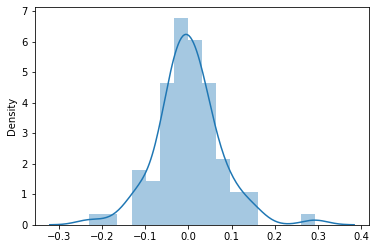

In [219]:
# Distribution of residuals or error terms
sns.distplot(residual)

The residuals are normally distrubuted.

# Assumption

There should not be any pattern in the error terms

Text(0, 0.5, 'residual')

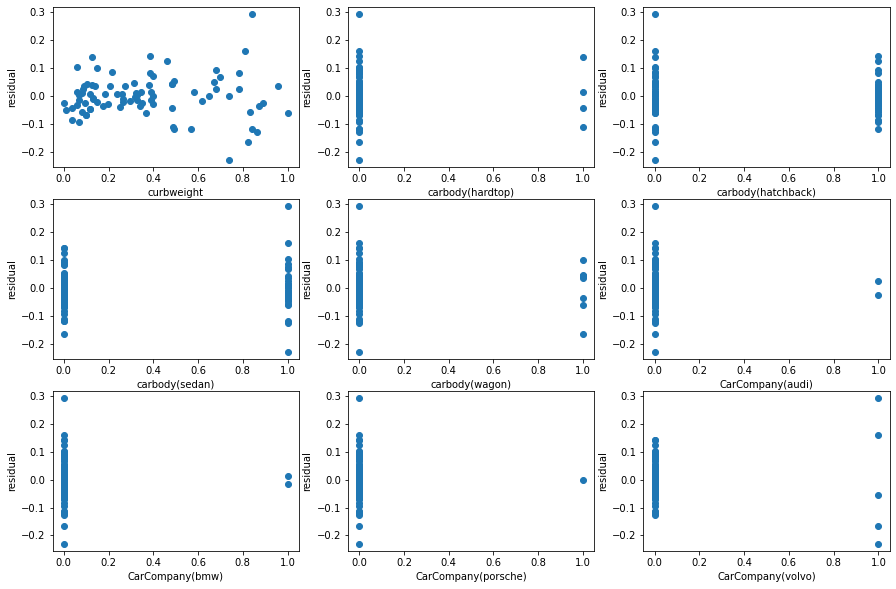

In [220]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.scatter(X_train_12['curbweight'], residual)
plt.xlabel('curbweight')
plt.ylabel('residual')
plt.subplot(3,3,2)
plt.scatter(X_train_12['carbody(hardtop)'], residual)
plt.xlabel('carbody(hardtop)')
plt.ylabel('residual')
plt.subplot(3,3,3)
plt.scatter(X_train_12['carbody(hatchback)'], residual)
plt.xlabel('carbody(hatchback)')
plt.ylabel('residual')
plt.subplot(3,3,4)
plt.scatter(X_train_12['carbody(sedan)'], residual)
plt.xlabel('carbody(sedan)')
plt.ylabel('residual')
plt.subplot(3,3,5)
plt.scatter(X_train_12['carbody(wagon)'], residual)
plt.xlabel('carbody(wagon)')
plt.ylabel('residual')
plt.subplot(3,3,6)
plt.scatter(X_train_12['CarCompany(audi)'], residual)
plt.xlabel('CarCompany(audi)')
plt.ylabel('residual')
plt.subplot(3,3,7)
plt.scatter(X_train_12['CarCompany(bmw)'], residual)
plt.xlabel('CarCompany(bmw)')
plt.ylabel('residual')
plt.subplot(3,3,8)
plt.scatter(X_train_12['CarCompany(porsche)'], residual)
plt.xlabel('CarCompany(porsche)')
plt.ylabel('residual')
plt.subplot(3,3,9)
plt.scatter(X_train_12['CarCompany(volvo)'], residual)
plt.xlabel('CarCompany(volvo)')
plt.ylabel('residual')

# Stpe 5:- Predictions and evaluation on the test set

In [221]:
 #Scale the test set variables with min-max scaler

# Transform the data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
22,1,1,0,1,1,0.257246,0.233886,0.037736,0.181818,0.038592,0.180180,0.230159,0.611111,0.666667,0.069565,0.583333,0.681818,0.64,0.057322,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
181,1,1,1,0,1,0.648551,0.795580,0.547170,0.481818,0.901828,0.819820,0.468254,0.744444,0.571429,0.834783,0.333333,0.136364,0.08,0.601126,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
171,1,1,0,0,1,0.427536,0.581952,0.377358,0.290909,0.605958,0.684685,0.746032,0.911111,0.619048,0.486957,0.000000,0.363636,0.32,0.357392,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
107,1,1,1,0,1,0.771739,0.775322,0.905660,0.718182,0.813135,0.450450,0.619048,0.566667,0.190476,0.321739,0.166667,0.136364,0.08,0.377756,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
150,1,1,0,1,1,0.329710,0.259669,0.000000,0.518182,0.112390,0.198198,0.293651,0.388889,0.476190,0.017391,0.000000,0.863636,0.68,-0.002379,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Create X_test and y_test

In [222]:
# Popping out the 'price' column for y_test
y_test = df_test.pop('price')

# Creating X_test
X_test = df_test

# We have to drop the variables, which we dropped in the train set upon the p-value and VIF calculations

In [223]:
# Taking only the columns from the final model.
X_test = X_test[X_train_12.columns]
X_test.head()

,carheight,curbweight,stroke,horsepower,peakrpm,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),CarCompany(audi),CarCompany(bmw),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(porsche),CarCompany(saab),CarCompany(volvo)
22,0.181818,0.038592,0.611111,0.069565,0.583333,0,1,0,0,0,0,0,0,0,0,0
181,0.481818,0.901828,0.744444,0.834783,0.333333,0,0,0,1,0,0,0,0,0,0,0
171,0.290909,0.605958,0.911111,0.486957,0.000000,0,1,0,0,0,0,0,0,0,0,0
107,0.718182,0.813135,0.566667,0.321739,0.166667,0,0,1,0,0,0,0,0,0,0,0
150,0.518182,0.112390,0.388889,0.017391,0.000000,0,1,0,0,0,0,0,0,0,0,0


In [224]:
# Add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,carheight,curbweight,stroke,horsepower,peakrpm,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),CarCompany(audi),CarCompany(bmw),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(porsche),CarCompany(saab),CarCompany(volvo)
22,1.0,0.181818,0.038592,0.611111,0.069565,0.583333,0,1,0,0,0,0,0,0,0,0,0
181,1.0,0.481818,0.901828,0.744444,0.834783,0.333333,0,0,0,1,0,0,0,0,0,0,0
171,1.0,0.290909,0.605958,0.911111,0.486957,0.000000,0,1,0,0,0,0,0,0,0,0,0
107,1.0,0.718182,0.813135,0.566667,0.321739,0.166667,0,0,1,0,0,0,0,0,0,0,0
150,1.0,0.518182,0.112390,0.388889,0.017391,0.000000,0,1,0,0,0,0,0,0,0,0,0


In [225]:
# Predict the model on the test set
y_test_pred = lr_model_12.predict(X_test_sm)

# Evaluate the model

In [226]:
# Evaluate the model with r-squared on the test set
r2 = r2_score(y_test, y_test_pred)
r2

0.8254657838151545

# Conclusion

R-squared on the test set = 0.82

R-squared on the train set = 0.93

We can see that there is 0.07 difference between the R-Squared of the train and test set. That means, what the model has learnt on the train set, it is not generalise well in the test set. The model seems to be overfitted with the train data. But the R-Squared of the test set 0.82 is not a poor result. The model is able to explain 82% variance of the data in the test set. The model accuracy can be improved further by making it more generalise.

Text(0, 0.5, 'y_test_pred')

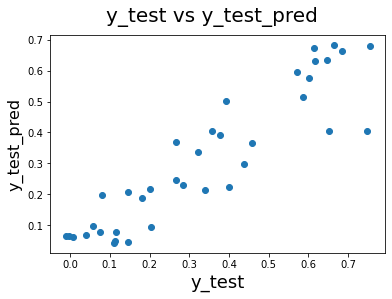

In [227]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_test_pred', fontsize=16)